# Team Name: i9192
# Machine Learning Project - Why So Harsh?

## Members:
### 1. Venkat Suprabath Bitra (IMT2019091)
### 2. Vignesh Bondugula (IMT2019092)

## Exploratory Data Analysis (EDA)

In [1]:
# Necessary Imports

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


from collections import Counter

import re
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Loading Train Dataset
df_train = pd.read_csv('/data/train.csv')

In [5]:
df_train.columns

Index(['id', 'text', 'harsh', 'extremely_harsh', 'vulgar', 'threatening',
       'disrespect', 'targeted_hate'],
      dtype='object')

In [6]:
# Storing Required Column Names
COLUMNS = ['harsh', 'extremely_harsh', 'vulgar', 'threatening', 'disrespect', 'targeted_hate']

df_train['none'] = (df_train[COLUMNS].max(axis=1) == 0).astype(int)
COLUMNS.append('none')
CATEGORIES = COLUMNS.copy()

print(df_train.shape)
print(df_train.columns.values)

(127656, 9)
['id' 'text' 'harsh' 'extremely_harsh' 'vulgar' 'threatening' 'disrespect'
 'targeted_hate' 'none']


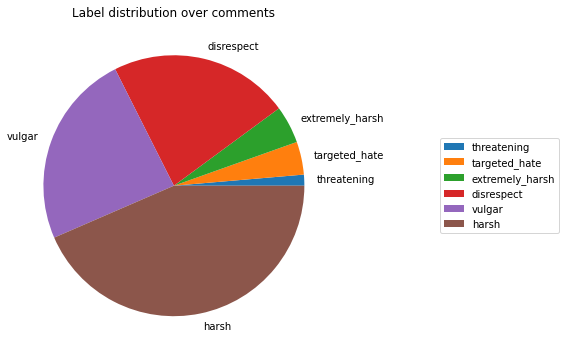

In [7]:
# Generating the distribution of labels for the Pie Chart
df_distribution = df_train[COLUMNS].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')

df_distribution.drop('none').plot.pie(
    y='count',
    ylabel = '',
    title='Label distribution over comments',
    figsize=(6, 6)).legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [8]:
# Checking Value Counts of the Labels
df_distribution.sort_values('count', ascending=False)

,count
none,114692
harsh,12227
vulgar,6772
disrespect,6278
extremely_harsh,1310
targeted_hate,1147
threatening,383


In [9]:
# Generating occurences of all combinations of the 6 types of comments
df_comb = df_train.groupby(COLUMNS).size().sort_values(ascending=False).reset_index().rename(columns={0: 'count'})
df_comb

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate,none,count
0,0,0,0,0,0,0,1,114692
1,1,0,0,0,0,0,0,4520
2,1,0,1,0,1,0,0,2998
3,1,0,1,0,0,0,0,1422
4,1,0,0,0,1,0,0,957
5,1,1,1,0,1,0,0,797
6,1,0,1,0,1,1,0,497
7,0,0,1,0,0,0,0,248
8,0,0,0,0,1,0,0,239
9,1,1,1,0,1,1,0,221


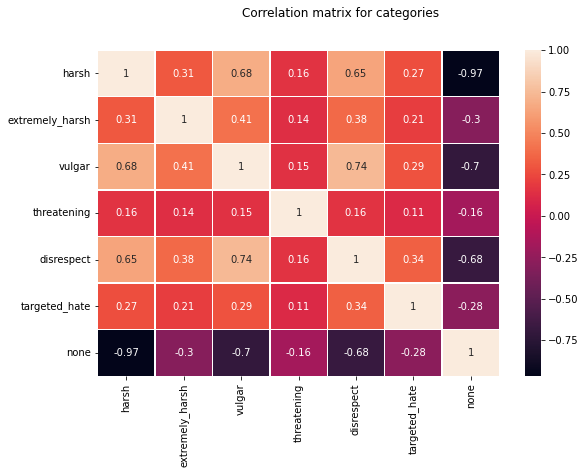

In [10]:
# Making Correlation Matrix of Column Labels
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sns.heatmap(df_train[COLUMNS].corr(), annot=True, linewidths=.5, ax=ax)

In [12]:
# Generating Word Counts for the Word Clouds
word_counter = {}
stop = stopwords.words('english')

def clean_text(text):
    text = re.sub('[{}]'.format(string.punctuation), ' ', text.lower())
    return ' '.join([word for word in text.split() if word not in (stop)])

for categ in CATEGORIES:
    d = Counter()
    df_train[df_train[categ] == 1]['text'].apply(lambda t: d.update(clean_text(t).split()))
    word_counter[categ] = pd.DataFrame.from_dict(d, orient='index').rename(columns={0: 'count'}).sort_values('count', ascending=False)

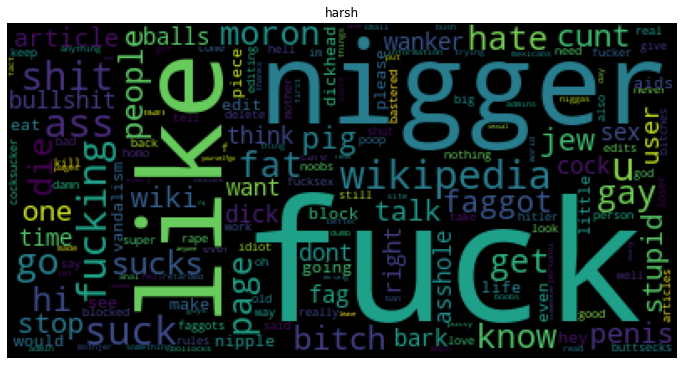

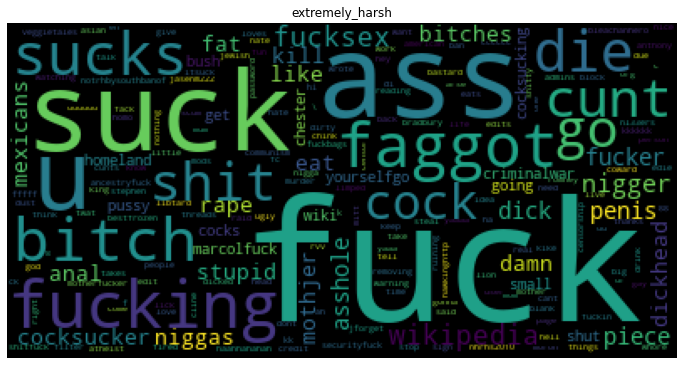

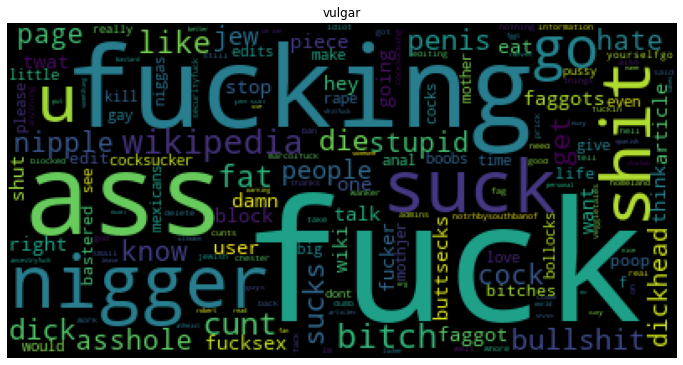

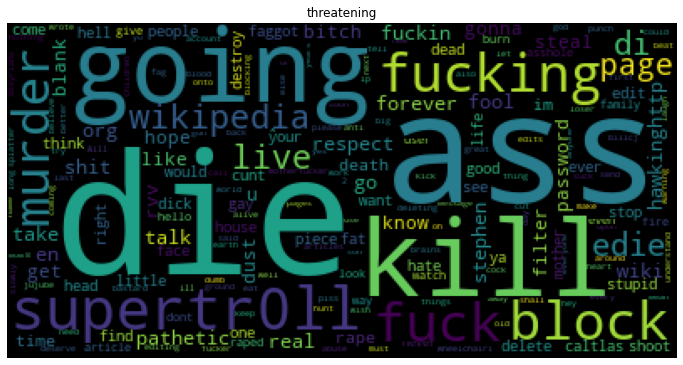

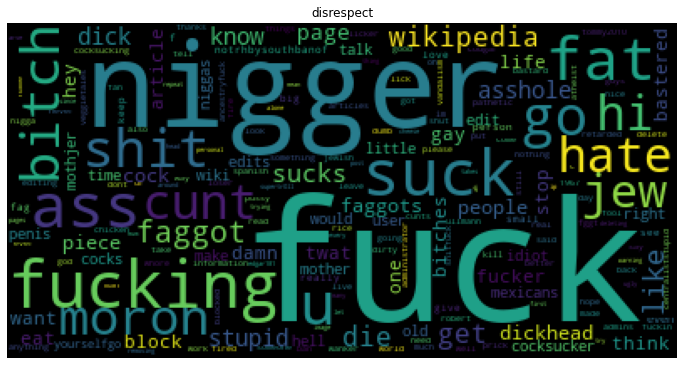

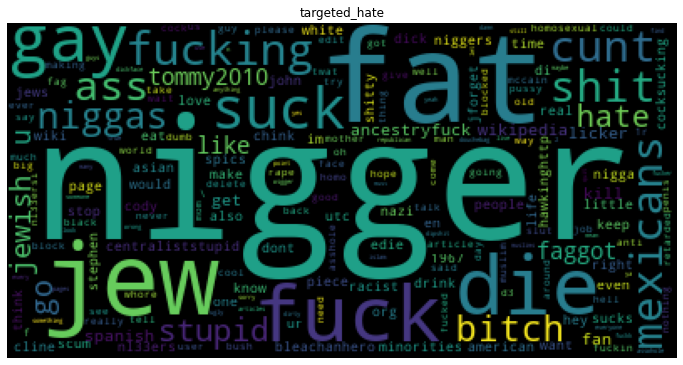

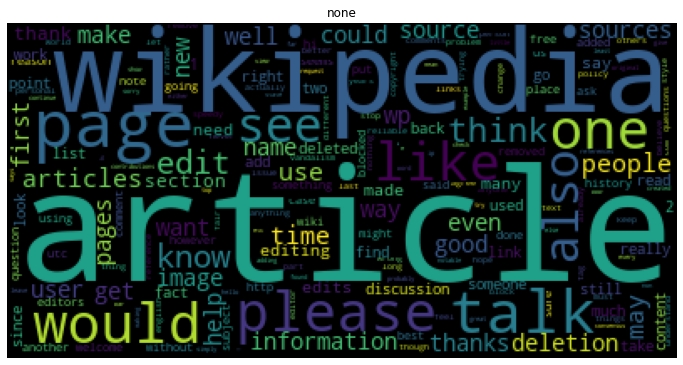

In [13]:
# Word Cloud for all the columns
for w in word_counter:
    wc = word_counter[w]

    wordcloud = WordCloud(
          background_color='black',
          max_words=200,
          max_font_size=100, 
          random_state=4561
         ).generate_from_frequencies(wc.to_dict()['count'])

    fig = plt.figure(figsize=(12, 8))
    plt.title(w)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

## Data Preprocessing

### NLTK

In [17]:
!pip install pandarallel
import pandas as pd
from pandarallel import pandarallel

pandarallel.initialize()

df_train = pd.read_csv('/data/train.csv')
df_test = pd.read_csv('/data/test.csv')

cols = ['harsh', 'extremely_harsh', 'vulgar', 'threatening', 'disrespect', 'targeted_hate']
for c in cols:
    print(df_train[c].value_counts())

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
0    115429
1     12227
Name: harsh, dtype: int64
0    126346
1      1310
Name: extremely_harsh, dtype: int64
0    120884
1      6772
Name: vulgar, dtype: int64
0    127273
1       383
Name: threatening, dtype: int64
0    121378
1      6278
Name: disrespect, dtype: int64
0    126509
1      1147
Name: targeted_hate, dtype: int64


### 1. Merging df_train and df_test text so as to complete preprocessing quickly

In [18]:
df_train_out = df_train[['id', *cols]]

data = df_train[['id', 'text']]
data = data.append(df_test, ignore_index=True)

data.shape

(159571, 2)

### 2. Converting Text to Lower case

In [19]:
data['text_lcase'] = data['text'].parallel_apply(lambda text: text.lower())

data.head()

,id,text,text_lcase
0,52e0f91a5d7b74552c55,New Main Picture \n\nHow about this for the ma...,new main picture \n\nhow about this for the ma...
1,e2c8e370a8e53ba26bae,Think of them like population charts. Just bec...,think of them like population charts. just bec...
2,03c807f61149a13c8404,This page seems a little misleading. The reaso...,this page seems a little misleading. the reaso...
3,fc63a1ba3372899db19f,"""\n\nActually, accounts are never deleted. ""","""\n\nactually, accounts are never deleted. """
4,0c2bfd9cde8974d9915f,"""\n\nYeah yeah, OK. So did I. Still, what I ...","""\n\nyeah yeah, ok. so did i. still, what i ..."


### 3. Tokening the strings

In [20]:
#Removing URLS
import re
url_reg  = r'[a-z]*[:.]+\S+'
def remove_url(l):
  text = re.sub(url_reg, '', l)
  if len(text)!=0:
    return text    
  else:
    return ""
data['no_url'] = data['text_lcase'].parallel_apply(remove_url)

In [21]:
#Remove numbers, extra spaces and underscores
import re
url_reg  = r'[a-z]*[:.]+\S+'
def remove_url(l):
  text = re.sub(url_reg, ' ', l)
  text = re.sub(r'[0-9]+', ' ', text)
  text = re.sub(r'\s+', ' ',text)
  text = re.sub(r'_+', '',text)
  text = re.sub(r'(.)\1+', r'\1', text)
  if len(text)!=0:
    return text    
  else:
    return ""
data['no_num'] = data['no_url'].parallel_apply(remove_url)

In [22]:
import nltk
from nltk.tokenize import TweetTokenizer

nltk.data.path.append("./nltk")

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', download_dir='./nltk')

tweet = TweetTokenizer()

[nltk_data] Downloading package punkt to ./nltk...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
data['text_token'] = data['no_num'].parallel_apply(lambda text: tweet.tokenize(text))

del tweet

### 4. Removing the punctuations

In [24]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
remove_punctuations = lambda text: [i for i in text if i not in string.punctuation]

data['text_nopunc'] = data['text_token'].parallel_apply(remove_punctuations)

data.head()

,id,text,text_lcase,no_url,no_num,text_token,text_nopunc
0,52e0f91a5d7b74552c55,New Main Picture \n\nHow about this for the ma...,new main picture \n\nhow about this for the ma...,new main picture \n\nhow about this for the ma...,new main picture how about this for the main p...,"[new, main, picture, how, about, this, for, th...","[new, main, picture, how, about, this, for, th..."
1,e2c8e370a8e53ba26bae,Think of them like population charts. Just bec...,think of them like population charts. just bec...,think of them like population charts. just bec...,think of them like population charts. just bec...,"[think, of, them, like, population, charts, .,...","[think, of, them, like, population, charts, ju..."
2,03c807f61149a13c8404,This page seems a little misleading. The reaso...,this page seems a little misleading. the reaso...,this page seems a little misleading. the reaso...,this page sems a litle misleading. the reason ...,"[this, page, sems, a, litle, misleading, ., th...","[this, page, sems, a, litle, misleading, the, ..."
3,fc63a1ba3372899db19f,"""\n\nActually, accounts are never deleted. ""","""\n\nactually, accounts are never deleted. ""","""\n\nactually, accounts are never deleted. """,""" actualy, acounts are never deleted. ""","["", actualy, ,, acounts, are, never, deleted, ...","[actualy, acounts, are, never, deleted]"
4,0c2bfd9cde8974d9915f,"""\n\nYeah yeah, OK. So did I. Still, what I ...","""\n\nyeah yeah, ok. so did i. still, what i ...","""\n\nyeah yeah, ok. so did i. still, what i ...",""" yeah yeah, ok. so did i. stil, what i meant ...","["", yeah, yeah, ,, ok, ., so, did, i, ., stil,...","[yeah, yeah, ok, so, did, i, stil, what, i, me..."


### 5. Lemmatizing the strings

In [26]:
from nltk.stem import WordNetLemmatizer

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet', download_dir='./nltk')

pandarallel.initialize(nb_workers=4)

lemmatizer = WordNetLemmatizer()

lemmatize = lambda text: [lemmatizer.lemmatize(word) for word in text]

data['text_lemmatized'] = data['text_nopunc'].parallel_apply(lemmatize)

data.head()

del lemmatizer

[nltk_data] Downloading package wordnet to ./nltk...
[nltk_data]   Unzipping corpora/wordnet.zip.
INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


### 6. Stopword Removal (Not useful for some columns)

In [27]:
import nltk.corpus as corpus

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', download_dir='./nltk')

stopwords = corpus.stopwords.words('english')

In [28]:
remove_stopwords = lambda text: [i for i in text if i not in stopwords]

data['no_stopwords'] = data['text_lemmatized'].parallel_apply(lambda x: remove_stopwords(x))

data.head()

,id,text,text_lcase,no_url,no_num,text_token,text_nopunc,text_lemmatized,no_stopwords
0,52e0f91a5d7b74552c55,New Main Picture \n\nHow about this for the ma...,new main picture \n\nhow about this for the ma...,new main picture \n\nhow about this for the ma...,new main picture how about this for the main p...,"[new, main, picture, how, about, this, for, th...","[new, main, picture, how, about, this, for, th...","[new, main, picture, how, about, this, for, th...","[new, main, picture, main, picture, sadly, don..."
1,e2c8e370a8e53ba26bae,Think of them like population charts. Just bec...,think of them like population charts. just bec...,think of them like population charts. just bec...,think of them like population charts. just bec...,"[think, of, them, like, population, charts, .,...","[think, of, them, like, population, charts, ju...","[think, of, them, like, population, chart, jus...","[think, like, population, chart, every, year, ..."
2,03c807f61149a13c8404,This page seems a little misleading. The reaso...,this page seems a little misleading. the reaso...,this page seems a little misleading. the reaso...,this page sems a litle misleading. the reason ...,"[this, page, sems, a, litle, misleading, ., th...","[this, page, sems, a, litle, misleading, the, ...","[this, page, sems, a, litle, misleading, the, ...","[page, sems, litle, misleading, reason, midpoi..."
3,fc63a1ba3372899db19f,"""\n\nActually, accounts are never deleted. ""","""\n\nactually, accounts are never deleted. ""","""\n\nactually, accounts are never deleted. """,""" actualy, acounts are never deleted. ""","["", actualy, ,, acounts, are, never, deleted, ...","[actualy, acounts, are, never, deleted]","[actualy, acounts, are, never, deleted]","[actualy, acounts, never, deleted]"
4,0c2bfd9cde8974d9915f,"""\n\nYeah yeah, OK. So did I. Still, what I ...","""\n\nyeah yeah, ok. so did i. still, what i ...","""\n\nyeah yeah, ok. so did i. still, what i ...",""" yeah yeah, ok. so did i. stil, what i meant ...","["", yeah, yeah, ,, ok, ., so, did, i, ., stil,...","[yeah, yeah, ok, so, did, i, stil, what, i, me...","[yeah, yeah, ok, so, did, i, stil, what, i, me...","[yeah, yeah, ok, stil, meant, know, nothing, s..."


### 7. Using various models to encode textual data

In [29]:
join_words = lambda words: ' '.join(words)
data['preproc_text'] = data['no_stopwords'].parallel_apply(join_words)

In [30]:
data.columns

Index(['id', 'text', 'text_lcase', 'no_url', 'no_num', 'text_token',
       'text_nopunc', 'text_lemmatized', 'no_stopwords', 'preproc_text'],
      dtype='object')

### Saving Data in form of pickles

In [32]:
data.to_pickle('/data/pickles/data.pickle')

In [33]:
df_train_out['text'] = data[data['id'].isin(df_train_out['id'])]['preproc_text']
df_test['text'] = data[data['id'].isin(df_test['id'])]['preproc_text'].reset_index(drop=True)

In [34]:
df_train_out.to_pickle('/data/pickles/df_train_out.pickle')
df_test.to_pickle('/data/pickles/df_test.pickle')

###Loading Data from pickles

In [36]:
#Data is loaded from pickles when trying different models instead of running preprocessing again
data = pd.read_pickle('/data/pickles/data.pickle')
df_test = pd.read_pickle('/data/pickles/df_test.pickle')

df_train_out = pd.read_pickle('/data/pickles/df_train_out.pickle')

## Text Featurization

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english')
tfidf_mat = vectorizer.fit_transform(df_train_out['text'].to_list())

In [38]:
tfidf_out_mat = vectorizer.transform(df_test['text'].to_list())

## Models

### Model 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

roc_list = []
conf_list = []

main_preds = {
    'id': df_test['id']
}

cols = ['harsh', 'extremely_harsh', 'vulgar', 'threatening', 'disrespect', 'targeted_hate']

for i in range(len(cols)):
    vals = df_train[cols[i]].to_numpy()
    x_train, x_test, y_train, y_test = train_test_split(tfidf_mat, vals, stratify=vals, train_size=0.8)
    model = LogisticRegression(class_weight='balanced')
    model.fit(x_train, y_train)

    roc_list.append((
        roc_auc_score(y_train, model.predict_proba(x_train)[:, 1]),
        roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    ))
    conf_list.append((
        confusion_matrix(y_train, model.predict(x_train)),
        confusion_matrix(y_test, model.predict(x_test))
    ))
    main_preds[cols[i]] = model.predict_proba(tfidf_out_mat)[:, 1]

df_submit = pd.DataFrame(main_preds)

df_submit.to_csv('submission.csv', index=None)


### Model 2: SGD Classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english', min_df=5,ngram_range=(1,3), lowercase = False)
tfidf_mat = vectorizer.fit_transform(df_train_out['text'].to_list())

In [ ]:
tfidf_out_mat = vectorizer.transform(df_test['text'].to_list())

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

In [ ]:
roc_auc_scorer = make_scorer(
    roc_auc_score, 
    greater_is_better=True, 
    needs_proba=True
)

grid_params = {
    'loss' : ['log', 'modified_huber'],
    'penalty' : ['l1','l2','elasticnet'],
    'l1_ratio' : [0.1,0.15,0.2,0.25],
    'alpha' : [10**i for i in range(-6,0)],
}

cols = ['harsh', 'extremely_harsh', 'vulgar', 'threatening', 'disrespect', 'targeted_hate']
x_train, x_test, y_train, y_test = train_test_split(tfidf_mat, df_train_out[cols], stratify=df_train_out['harsh'], train_size=0.75)

In [ ]:
from sklearn.linear_model import SGDClassifier

results = []
best = []
score = []

for col in cols:
    print(col, "started!")
    sgdc = SGDClassifier(n_jobs = 6, class_weight='balanced', random_state = 0)
    gcv = GridSearchCV(sgdc, grid_params, n_jobs=8,scoring=roc_auc_scorer)
    gcv.fit(x_train,y_train[col])
    results.append(gcv.cv_results_)
    best.append(gcv.best_estimator_)
    score.append(gcv.best_score_)
    print(col, "ended!")

In [ ]:
res = {'id': df_test['id']}

for i, col in enumerate(cols):
    best[i].fit(tfidf_mat, df_train_out[col])
    res[col] = best[i].predict_proba(tfidf_out_mat)[:, 1]

pd.DataFrame(res).to_csv('submission.csv', index=None)

### Model 3: Ridge

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

import re
url_reg  = r'[a-z]*[:.]+\S+'
def remove_url(l):
  text = re.sub(url_reg, '', l)
  if len(text)!=0:
    return text    
  else:
    return ""
data['text'] = data['text'].parallel_apply(remove_url)

data['tokenized'] = data['text'].parallel_apply(lambda x: ' '.join(word_tokenize(x)))

In [ ]:
from sklearn.model_selection import train_test_split

train_val_modules= []

df_train['preproc'] = data[data['id'].isin(df_train['id'])]['tokenized'].reset_index(drop=True)
df_test['preproc'] = data[data['id'].isin(df_test['id'])]['tokenized'].reset_index(drop=True)

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    tokenizer=lambda x: re.findall(r'[^\\p{P}\W]+', x),
    analyzer='word',
    token_pattern=r'\w{1,}',
    min_df=5,
    ngram_range=(1, 1),
    stop_words='english',
    max_features=10000
)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)

vectorizer.fit(data['tokenized'])
char_vectorizer.fit(data['tokenized'])

In [ ]:
from sklearn.feature_selection import VarianceThreshold

wtfidf_mat = vectorizer.transform(data['tokenized'])
ctfidf_mat = char_vectorizer.transform(data['tokenized'])
vt = VarianceThreshold(threshold=0)
wtfidf_red = vt.fit_transform(wtfidf_mat)
cvt = VarianceThreshold(threshold=0)
ctfidf_red = vt.fit_transform(ctfidf_mat)

print(wtfidf_mat.shape, wtfidf_red.shape)
print(ctfidf_mat.shape, ctfidf_red.shape)

In [ ]:
wtfidf_red_tr = wtfidf_red[data['id'].isin(df_train['id'])]
wtfidf_red_tst = wtfidf_red[data['id'].isin(df_test['id'])]

ctfidf_red_tr = ctfidf_red[data['id'].isin(df_train['id'])]
ctfidf_red_tst = ctfidf_red[data['id'].isin(df_test['id'])]

In [ ]:
from scipy.sparse import hstack

tfidf_red_tr = hstack([wtfidf_red_tr, ctfidf_red_tr])
tfidf_red_tst = hstack([wtfidf_red_tst, ctfidf_red_tst])

In [ ]:
from scipy import sparse

sparse.save_npz('tfidf_red_tr.npz', tfidf_red_tr)
sparse.save_npz('tfidf_red_tst.npz', tfidf_red_tst)

In [ ]:
for col in cols:
    tfidf_tr, tfidf_val, y_train, y_val = train_test_split(tfidf_red_tr, df_train[col], stratify=df_train[col], train_size=0.8)
    train_val_modules.append((tfidf_tr, tfidf_val, y_train, y_val))

In [ ]:
from scipy import sparse
import pandas as pd

tfidf_red_tr = sparse.load_npz('tfidf_red_tr.npz')
tfidf_red_tst = sparse.load_npz('tfidf_red_tst.npz')

In [ ]:
sample_submission = pd.read_csv('data/sample_submission.csv')

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np

scores = []
scores2 = []

LR3 = pd.DataFrame.from_dict({'id': sample_submission['id']})

for i, col in enumerate(cols):
    tfidf_tr, tfidf_val, y_train, y_val = train_test_split(tfidf_red_tr, df_train[col], stratify=df_train[col], train_size=0.8)
    pred_model = Ridge(alpha=29, copy_X=True, fit_intercept=True, solver='sag',
                        max_iter=150, random_state=0, tol=0.0025)
    #AUC
    score = np.mean(cross_val_score( pred_model, tfidf_tr, y_train, cv=StratifiedKFold(n_splits=3), scoring='roc_auc'))
    scores.append(score)
    print('For {}, AUC is {}.'.format(col, score))

    pred_model.fit(tfidf_tr, y_train)
    yt = pred_model.predict(tfidf_val)
    scores2.append(roc_auc_score(y_val, yt))
    print('For {}, AUC is {}.'.format(col, scores2[-1]))
    
    pred_model.fit(tfidf_red_tr, df_train[col])
    LR3[col] = pred_model.predict(tfidf_red_tst)
    
print('\nOverall CV score is {}'.format(np.mean(scores)))
print('\nOverall CV score is {}'.format(np.mean(scores2)))

For harsh, AUC is 0.9762048850379997.
For harsh, AUC is 0.9782698024180428.
For extremely_harsh, AUC is 0.9867138710682228.
For extremely_harsh, AUC is 0.9854816077961074.
For vulgar, AUC is 0.9903356671206976.
For vulgar, AUC is 0.9914523353566905.
For threatening, AUC is 0.9868412095817276.
For threatening, AUC is 0.9831936674600199.
For disrespect, AUC is 0.982661989155786.
For disrespect, AUC is 0.982215469552377.
For targeted_hate, AUC is 0.9789012804218492.
For targeted_hate, AUC is 0.9796557427041032.

Overall CV score is 0.9836098170643806

Overall CV score is 0.9833781042145566


In [ ]:
LR3.to_csv('submission.csv', index=None)